## بخش ۱

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
with open('/content/drive/MyDrive/DM_CA5/label_StackOverflow.txt', 'r') as f:
    labels = [int(line.strip()) for line in f if line.strip()]
label_df = pd.DataFrame(labels, columns=['label'])

label_df

,label
0,18
1,18
2,3
3,3
4,7
...,...
19995,20
19996,20
19997,20
19998,20


In [4]:
import pandas as pd


titles = []
with open('/content/drive/MyDrive/DM_CA5/title_StackOverflow.txt', 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        clean_line = line.strip()
        if clean_line:
            titles.append(clean_line)


title_df = pd.DataFrame(titles, columns=['title'])

title_df

,title
0,How do I fill a DataSet or a DataTable from a ...
1,How do you page a collection with LINQ?
2,Best Subversion clients for Windows Vista (64bit)
3,"Best Practice: Collaborative Environment, Bin ..."
4,Visual Studio Setup Project - Per User Registr...
...,...
19995,Magento Custom Options VS Attributes
19996,How to solve 404 not found problem in Magento
19997,Want to add custom option from the frontend of...
19998,installing magento plugins without using magen...


In [5]:
assert len(titles) == len(labels), "number of titles is not same to labels"

In [6]:
from sentence_transformers import SentenceTransformer
# Create an embedding for each title
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(titles, show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

In [7]:
embeddings

array([[-3.1008607e-02,  4.6575769e-05,  1.1385731e-02, ...,
        -5.2819330e-02,  5.7307415e-04,  2.7543655e-02],
       [-6.4695075e-02,  6.4545602e-04,  1.3240832e-02, ...,
        -4.3488305e-02, -2.0164149e-02,  3.0185059e-02],
       [-7.8939125e-02, -3.6999058e-02, -1.3121576e-02, ...,
         2.4249829e-02,  4.3211434e-02,  1.8765777e-02],
       ...,
       [-9.0950847e-02, -3.9918222e-02,  6.2028289e-02, ...,
         4.9867928e-02, -2.9881403e-03,  6.4335816e-02],
       [-7.6423898e-02, -1.2492814e-02,  2.8748997e-02, ...,
         4.2816419e-02,  4.5070123e-02,  4.4149836e-03],
       [-5.4269336e-02, -2.3541616e-02,  3.9925877e-02, ...,
         4.3662619e-03,  2.1669243e-02,  1.3829525e-02]], dtype=float32)

## بخش ۲

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

pca_result = PCA(n_components=2).fit_transform(embeddings)
tsne_result = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(embeddings)
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


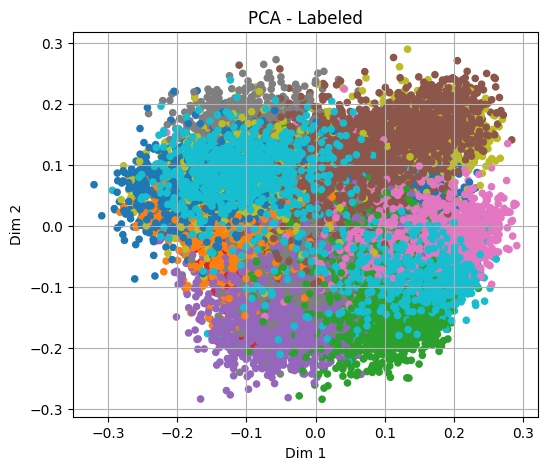

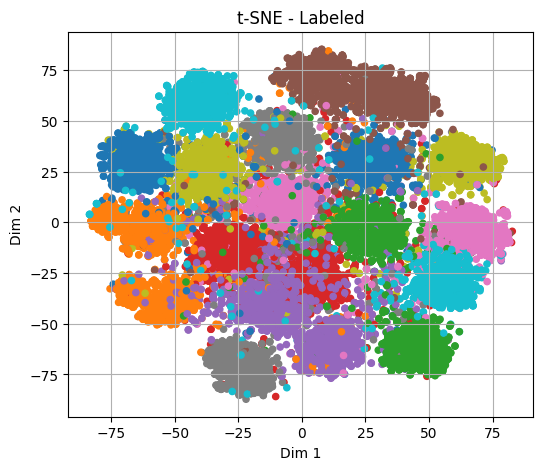

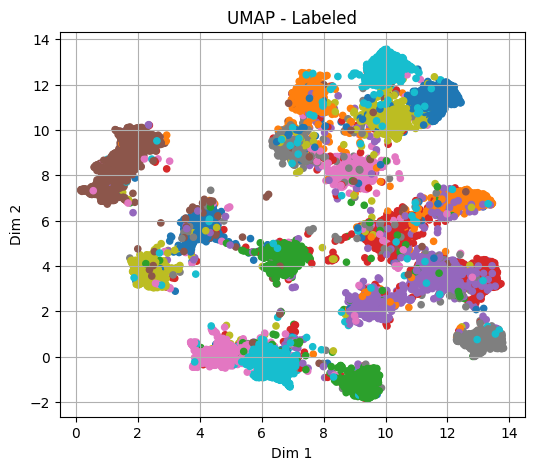

In [9]:
import matplotlib.pyplot as plt

def plot_embedding(result, title, labels):
    plt.figure(figsize=(6, 5))
    plt.scatter(result[:, 0], result[:, 1], c=labels, cmap='tab10', s=20)
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()

plot_embedding(pca_result, "PCA - Labeled", labels)
plot_embedding(tsne_result, "t-SNE - Labeled", labels)
plot_embedding(umap_result, "UMAP - Labeled", labels)

## بخش ۳

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


K=10, Silhouette Score=0.5539
K=15, Silhouette Score=0.5996
K=20, Silhouette Score=0.6681
K=25, Silhouette Score=0.6042


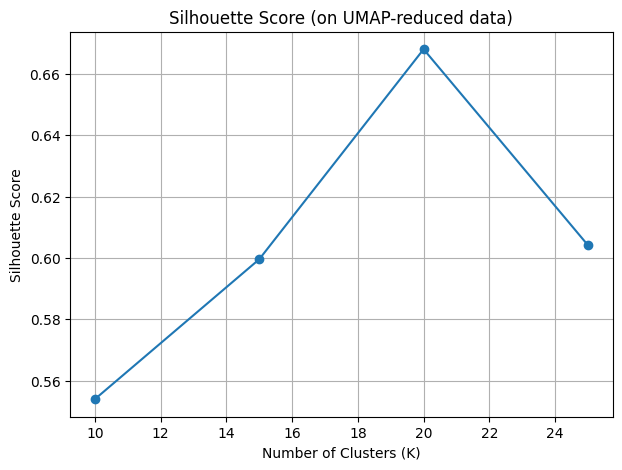

In [10]:
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


umap_2d = umap.UMAP(n_components=2, random_state=42)
reduced_embeddings = umap_2d.fit_transform(embeddings)


k_values = [10, 15, 20, 25]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(reduced_embeddings)
    score = silhouette_score(reduced_embeddings, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")


plt.figure(figsize=(7, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score (on UMAP-reduced data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

## بخش ۴

In [11]:
from sklearn.cluster import KMeans

# Run KMeans with K = 20

k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(reduced_embeddings)

In [12]:
from collections import Counter
import pandas as pd
import numpy as np


df = pd.DataFrame({
    'cluster': cluster_labels,
    'true_label': labels
})


print("Cluster size distribution:")
print(df['cluster'].value_counts().sort_index())

print("\nTrue label distribution within each cluster:")
for i in range(k):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['true_label'].value_counts())

Cluster size distribution:
cluster
0      964
1      983
2     1004
3     1122
4      634
5     1031
6     1979
7      855
8     1053
9     1001
10    1027
11    1002
12     972
13     970
14     984
15     983
16    1003
17    1073
18     416
19     944
Name: count, dtype: int64

True label distribution within each cluster:

Cluster 0:
true_label
24    528
0     436
Name: count, dtype: int64

Cluster 1:
true_label
1    983
Name: count, dtype: int64

Cluster 2:
true_label
2    1004
Name: count, dtype: int64

Cluster 3:
true_label
17    1117
9        5
Name: count, dtype: int64

Cluster 4:
true_label
14    634
Name: count, dtype: int64

Cluster 5:
true_label
12    1019
16      12
Name: count, dtype: int64

Cluster 6:
true_label
5     1068
15     911
Name: count, dtype: int64

Cluster 7:
true_label
6    855
Name: count, dtype: int64

Cluster 8:
true_label
21    571
9     482
Name: count, dtype: int64

Cluster 9:
true_label
10    1001
Name: count, dtype: int64

Cluster 10:
true_label
11  

In [13]:
print("Number of ground-truth categories:", len(set(labels)))
print("Number of predicted clusters:", len(set(cluster_labels)))

Number of ground-truth categories: 25
Number of predicted clusters: 20


In [14]:
def purity_score(y_true, y_pred):
    contingency = pd.crosstab(pd.Series(y_true), pd.Series(y_pred))
    return np.sum(np.amax(contingency.values, axis=0)) / np.sum(contingency.values)

purity = purity_score(labels, cluster_labels)
print(f"Purity: {purity:.4f}")

Purity: 0.8632


In [15]:
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(labels, cluster_labels)
print(f"NMI: {nmi:.4f}")

NMI: 0.9606


## بخش ۵

In [17]:

closest_texts_per_cluster = {}

for cluster_id in range(k):

    indices = np.where(cluster_labels == cluster_id)[0]

    cluster_points = reduced_embeddings[indices]

    center = kmeans.cluster_centers_[cluster_id]


    distances = np.linalg.norm(cluster_points - center, axis=1)

    closest_indices = indices[np.argsort(distances)[:5]]

    closest_texts = [titles[i] for i in closest_indices]

    closest_texts_per_cluster[cluster_id] = closest_texts

for cluster_id, questions in closest_texts_per_cluster.items():
    print(f"\nCluster {cluster_id} - Closest Questions:")
    for q in questions:
        print("•", q)


Cluster 0 - Closest Questions:
• Is there a convention for naming 'private functions' in bash?
• BASH: Test whether string is valid as an integer?
• Is it possible to detect 32 bit vs 64 bit in a bash script?
• How to define hash tables in bash?
• Bash Menu:  Return to menu after selection made and executed?

Cluster 1 - Closest Questions:
• Magento - change subject in newsletter subscription success email?
• How to get All Credit card Details entered by Customer till now in Magento?
• Magento: Can you set it so all Websites share the same order increment id sequence?
• Magento - Custom Products Ordered Report - How to Extend using "local" code pool?
• Magento - send newsletter subscription information as email

Cluster 2 - Closest Questions:
• Can you add values to an Oracle APEX Shuttle item using a textbox?
• bitwise exclusive OR in Oracle
• Oracle Identify Data Type
• Oracle in-line method to produce CSV for relation
• Oracle: OALL8 is in an inconsistent state

Cluster 3 - Closest

In [19]:

new_embedding = embedding_model.encode(["How to optimize SQL queries?"])


new_point = umap_2d.transform(new_embedding)

assigned_cluster = kmeans.predict(new_point)[0]
print(f"New question assigned to cluster {assigned_cluster}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


New question assigned to cluster 2
